<H1> CONSIDERACIONES: </H1>

<p> Función objetivo: <b> minimizar </b> Z=0.30x+0.90y </p>
<p> <b> Restricciones: </b> <br> (1)    x+y >= 800. <i> Cantidad total de alimento </i> <br> (2)  0.21x-0.30y <= 0. <i> cantidad de proteinas de al menos 30% </i><br> (3)   −0.03x+0.01y <= 0. <i> cantidad de fibra menor a 5%</i> </p>

<p> x1 : cantidad de gramos maiz, <br> y=x2 : cantidad de gramos soja. </p>

In [13]:
# Bibliotecas
import numpy as np                      
import matplotlib.pyplot as plt        
from scipy.optimize import linprog

In [14]:
#definir lo necesario para utilizar el metodo

coef_objetivo = np.array([0.3, 0.9]) # Coeficientes de la funcion objetivo 
matriz_coef = np.array([[-1,-1],[0.21, -0.30],[-0.03,0.01]]) # coeficientes de la matriz de inequalities
matriz_r = np.array([-800,0,0]) # coeficientes libres

In [15]:
solucion = linprog(coef_objetivo, matriz_coef, matriz_r, method="revised simplex") 
print(solucion)  # mostramos la estrucutra OptimizedResult

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 437.6470588235294
       x: [ 4.706e+02  3.294e+02]
     nit: 2


C:\Users\katia\AppData\Local\Temp\ipykernel_7356\1539727786.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solucion = linprog(coef_objetivo, matriz_coef, matriz_r, method="revised simplex")


In [16]:
def grafico(coef_objetivo,matriz_coef,matriz_r,limites,zz):
    N = matriz_coef.shape[0]
    print("Numero de Desigualdades(Restricciones): ", N)
    plt.figure()
    plt.title("Cost:  z = "+ " + ".join([str(x)+" x"+str(i+1) for i,x in enumerate(coef_objetivo)]))
    X = np.linspace(0,1000)
    for i in range(0,N):
        c_txt = " + ".join([str(x)+" x"+str(i+1) for i,x in enumerate(matriz_coef[i,:])]) + " <= " + str(matriz_r[i])
        plt.plot(X, -X*(matriz_coef[i,0]/matriz_coef[i,1]) + matriz_r[i]/matriz_coef[i,1] ,label = c_txt ) 

    for j in range(zz[0],zz[1], zz[2]):
        c_txt = "z = " + str(j)
        plt.plot(X, -X*(coef_objetivo[0]/coef_objetivo[1]) + (j/coef_objetivo[1]), "--" ,label = c_txt ) 
    solucion = linprog(coef_objetivo, matriz_coef, matriz_r, method="revised simplex")
    plt.plot(solucion.x[0],solucion.x[1],"ro", label="Solucion")
    plt.xlim(0,limites[0])
    plt.ylim(0,limites[1])
    plt.legend()
    plt.grid()
    plt.show()

In [17]:
np.dot(solucion.x.T , -coef_objetivo)

-437.6470588235294

C:\Users\katia\AppData\Local\Temp\ipykernel_7356\2692383783.py:14: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solucion = linprog(coef_objetivo, matriz_coef, matriz_r, method="revised simplex")


Numero de Desigualdades(Restricciones):  3


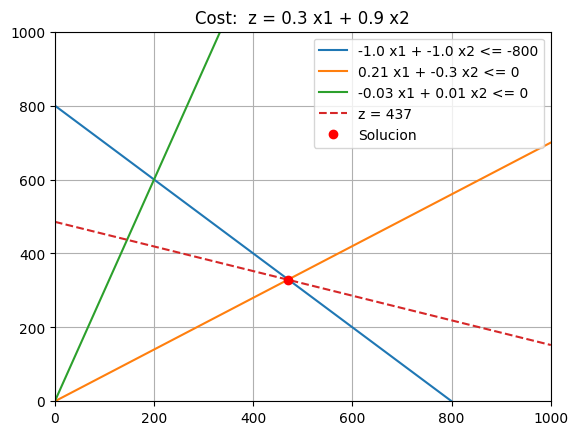

In [18]:

grafico(coef_objetivo, matriz_coef,matriz_r,[1000,1000],[437,500,1000])

<h1> SOLUCIONES </h1>

<p> cantidad de maíz: 470,6 gramos <br> cantidad de soja: 329,4 gramos </p>
<p> costo minimo diario: $437 </p>